Decision Tree (Classification on titanic dataset- classify wheather the person on titanic survived or not)

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = sns.load_dataset('titanic')

In [79]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Data Preprocessing on Titanic Dataset

In [80]:
df = df.drop(['deck', 'embarked', 'alive', 'class', 'who', 'adult_male','embark_town'], axis=1)


In [81]:
df

,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,male,22.0,1,0,7.2500,False
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,True
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,True
887,1,1,female,19.0,0,0,30.0000,True
888,0,3,female,NaN,1,2,23.4500,False
889,1,1,male,26.0,0,0,30.0000,True


Drop rows having Na values

In [82]:
df = df.dropna()

Replace the values of column sex with male as 1 and female as 0
and for alone replace True with 1 and False with 0

In [83]:
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)
df['alone'] = pd.get_dummies(df['alone'], drop_first=True) 

C:\Users\ML\AppData\Local\Temp\ipykernel_2080\3142512406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = pd.get_dummies(df['sex'], drop_first=True)
C:\Users\ML\AppData\Local\Temp\ipykernel_2080\3142512406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alone'] = pd.get_dummies(df['alone'], drop_first=True)


In [84]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    bool   
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   fare      714 non-null    float64
 7   alone     714 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 40.4 KB
None


In [85]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000
mean     0.406162    2.236695   29.699118    0.512605    0.431373   34.694514
std      0.491460    0.838250   14.526497    0.929783    0.853289   52.918930
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.125000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.741700
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.375000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200


In [86]:
print(df.shape)

(714, 8)


In [87]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone'], dtype='object')


In [88]:
X = df.drop('survived',axis = 1) 
y = df['survived']

Train Test Spliting is done. 80% data is given for training and 20

In [89]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

Without Pruning 

In [118]:
m1 = DecisionTreeClassifier(random_state=42)
m1.fit(X_train,y_train)
y1_pred=m1.predict(X_test) 
print("Acuraccy of Tree without pruning:", accuracy_score(y_test,y1_pred))

Acuraccy of Tree without pruning: 0.7062937062937062


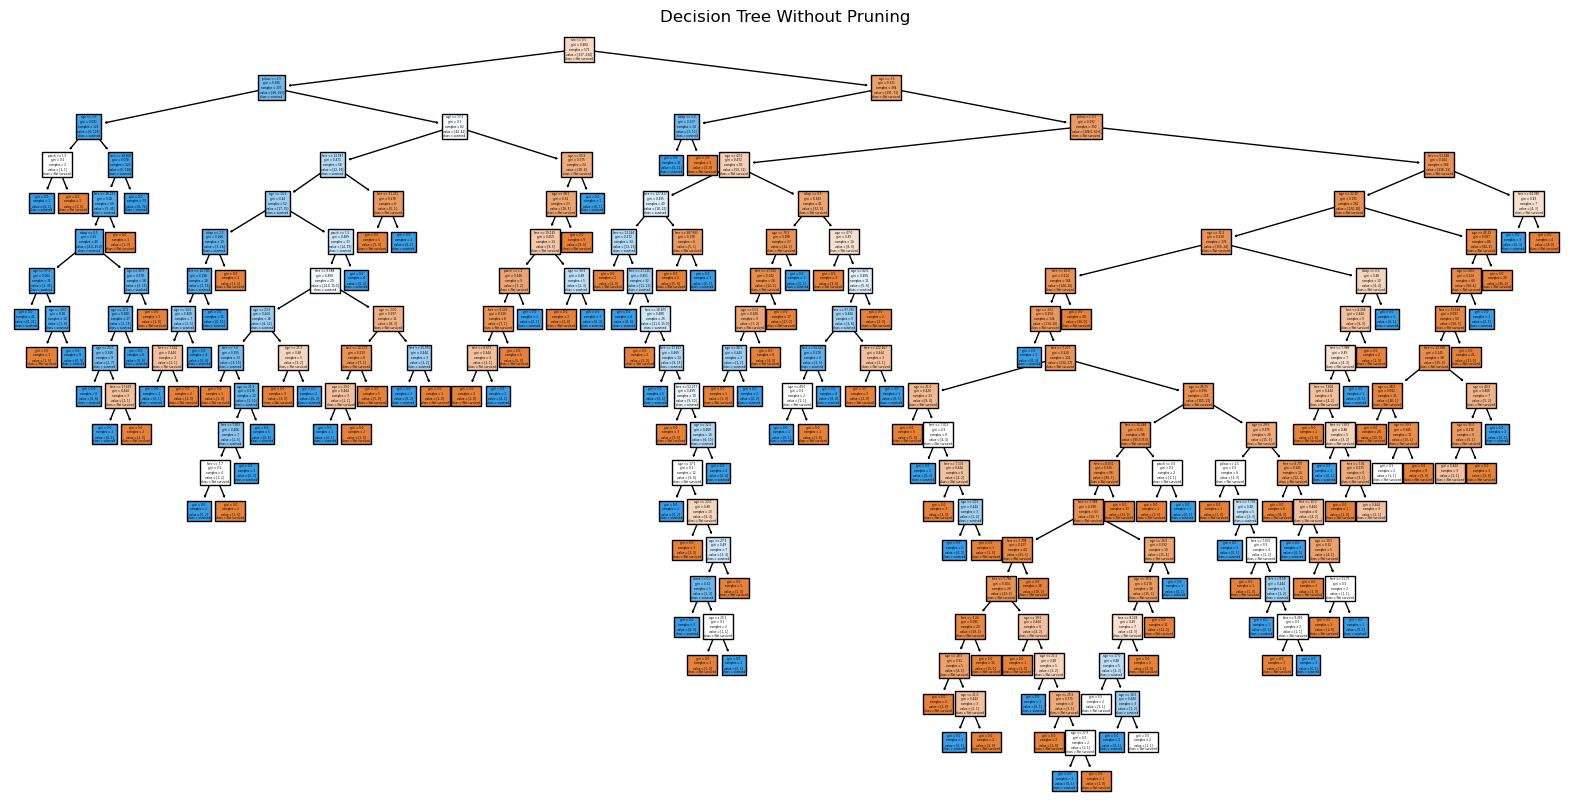

In [119]:
plt.figure(figsize=(20,10))
plot_tree(m1, feature_names=X.columns , class_names=['Not survived','survived'],filled=True)
plt.title("Decision Tree Without Pruning")
plt.show()

Decision Tree with Pre_pruning

In [92]:
m2 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 10, random_state = 42)
m2.fit(X_train, y_train)
y2_pred = m2.predict(X_test)
print("Acuraccy of Decision Tree with prepruning:", accuracy_score(y_test, y2_pred))

Acuraccy of Decision Tree with prepruning: 0.7482517482517482


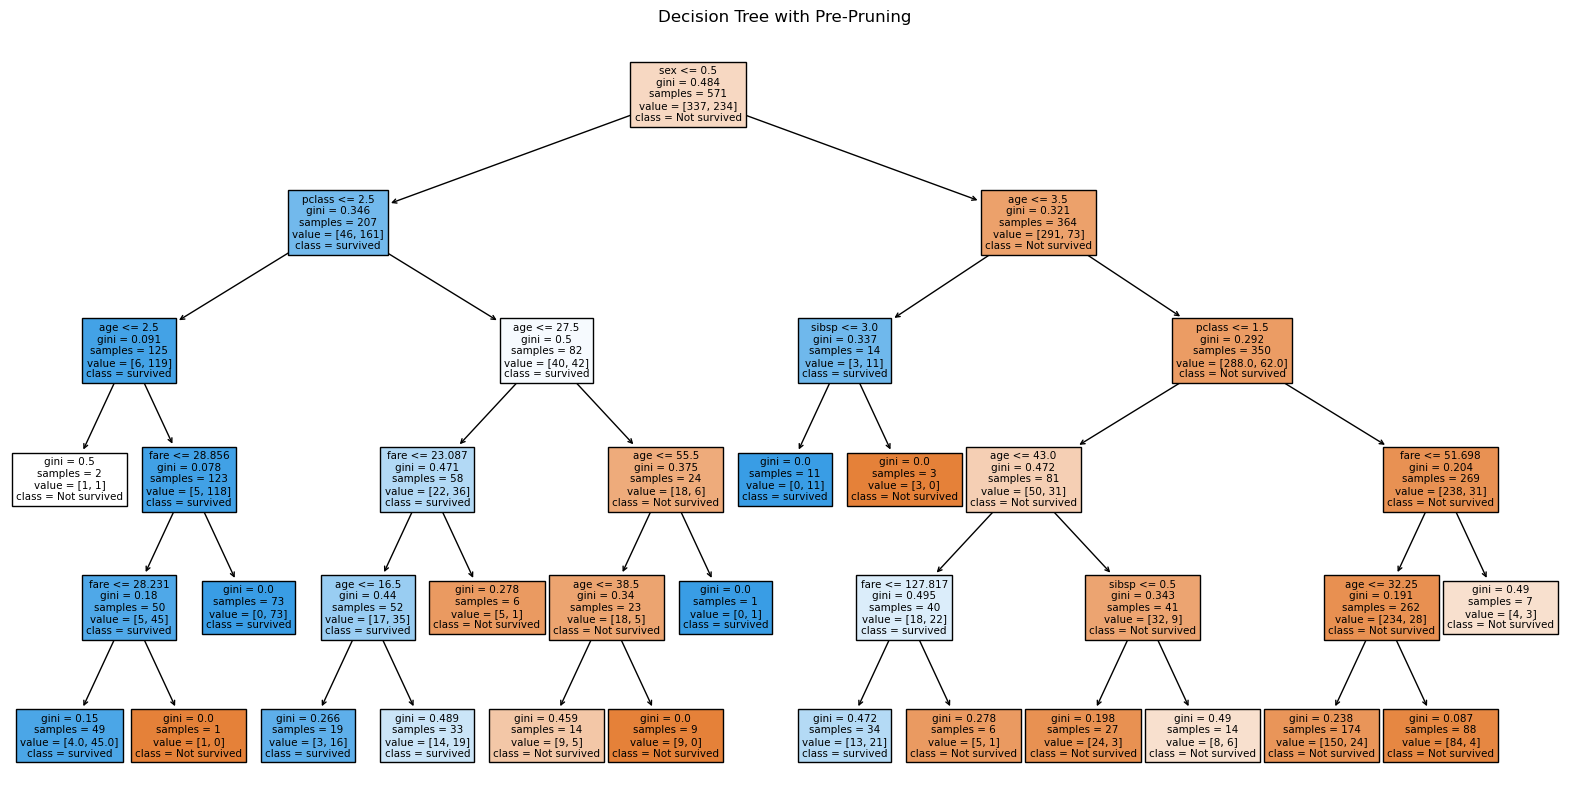

In [120]:
plt.figure(figsize=(20,10))
plot_tree(m2, feature_names=X.columns , class_names=['Not survived','survived'],filled=True)
plt.title("Decision Tree with Pre-Pruning")
plt.show()

Decision Tree with Post-Pruning

In [113]:
m3 = DecisionTreeClassifier(random_state=42)
m3.fit(X_train, y_train)
path = m3.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [117]:
models = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models]
best_path = ccp_alphas[np.argmax(accuracies)]
best_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_path)
best_model.fit(X_train, y_train)
y3_pred = best_model.predict(X_test)
print("Accuracy of decision tree with postpruning:", accuracy_score(y_test, y3_pred))

Accuracy of decision tree with postpruning: 0.7832167832167832


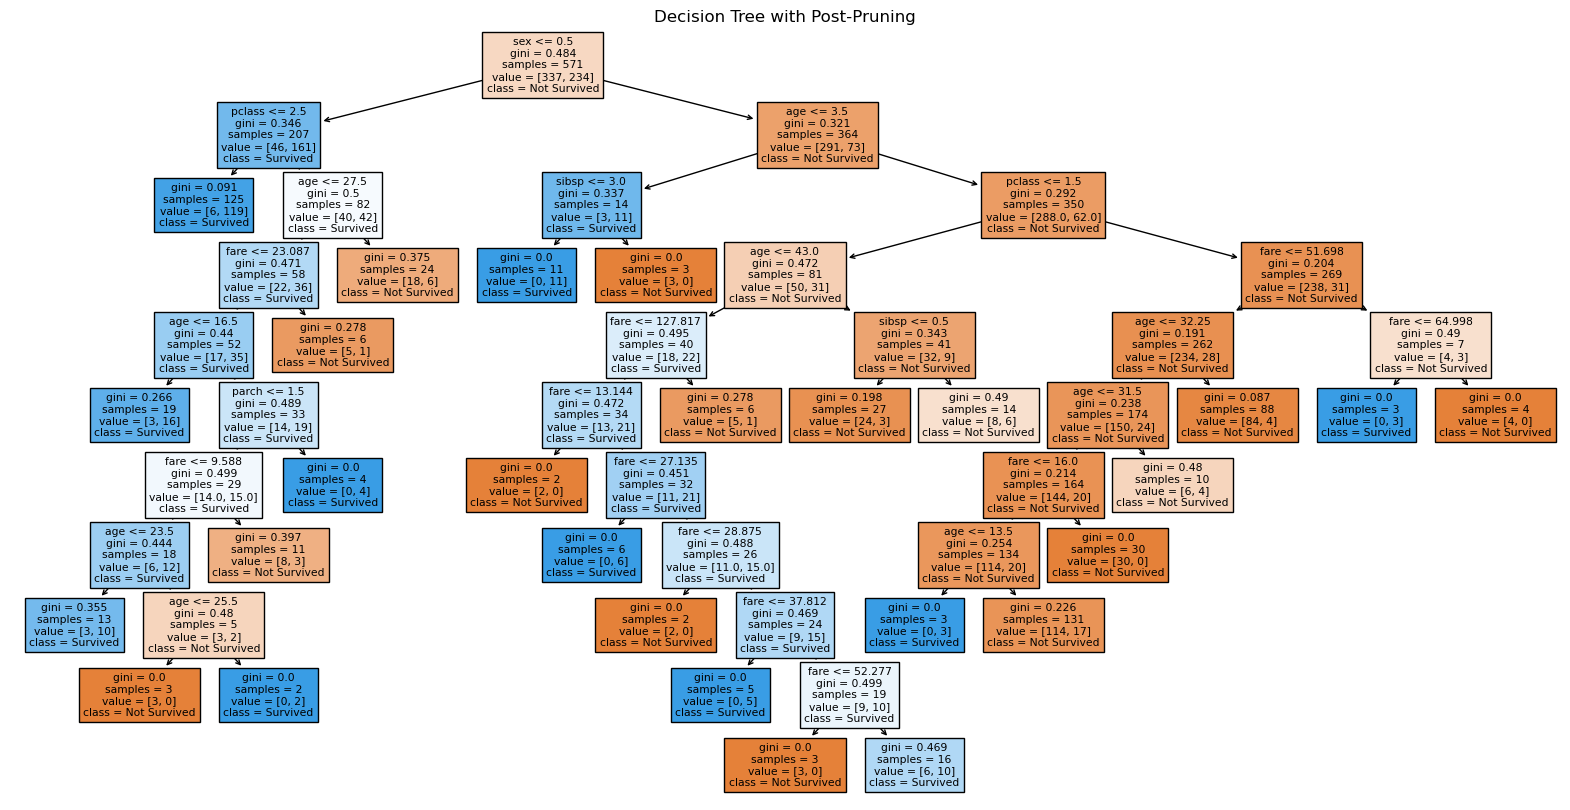

In [97]:
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree with Post-Pruning')
plt.show()

In [98]:
print("Classification Report for without pruning:\n\n", classification_report(y_test, y1_pred))

Classification Report for without pruning:

               precision    recall  f1-score   support

           0       0.77      0.74      0.75        87
           1       0.62      0.66      0.64        56

    accuracy                           0.71       143
   macro avg       0.69      0.70      0.70       143
weighted avg       0.71      0.71      0.71       143



In [99]:
print("Classification Report for prepruning:\n\n", classification_report(y_test, y2_pred))

Classification Report for prepruning:

               precision    recall  f1-score   support

           0       0.79      0.79      0.79        87
           1       0.68      0.68      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



In [121]:
print("Classification Report for postpruning:\n\n", classification_report(y_test, y3_pred))

Classification Report for postpruning:

               precision    recall  f1-score   support

           0       0.81      0.84      0.82        87
           1       0.74      0.70      0.72        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



Comparing the Classification Report of all the cases we come to know that accuracy of decision tree with post pruning is highest with 78%.  

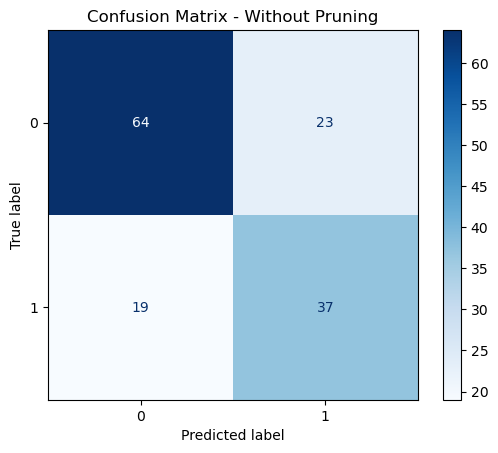

In [108]:
ConfusionMatrixDisplay.from_predictions(y_test, y1_pred, cmap='Blues')
plt.title('Confusion Matrix - Without Pruning')
plt.show()

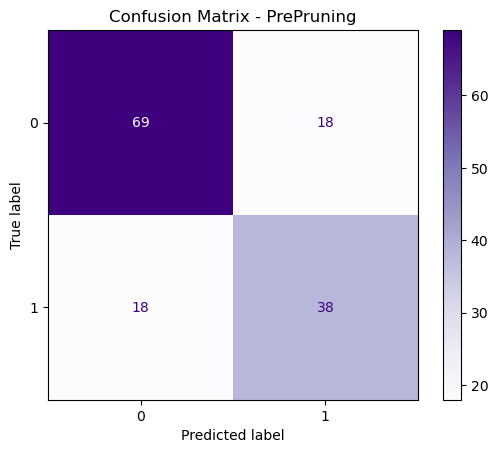

In [106]:
ConfusionMatrixDisplay.from_predictions(y_test, y2_pred, cmap='Purples')
plt.title('Confusion Matrix - PrePruning')
plt.show()

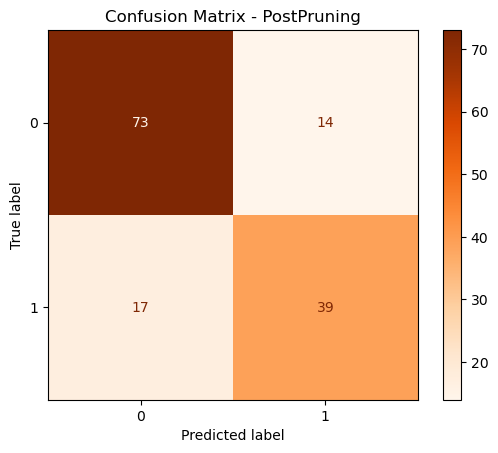

In [111]:
ConfusionMatrixDisplay.from_predictions(y_test, y3_pred, cmap='Oranges')
plt.title('Confusion Matrix - PostPruning')
plt.show()

Comparing the confusion matrices of all the cases we can conclude that the true positive and true negative values is highest for confusion matrix drawn for post-pruning. In this 73 people are shown not survived when they are actually not survived and 39 people are shown survived when they are actually survived. This values are highest for post pruning and lowest for without pruning.